In [4]:
import os
import csv
import pandas
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import proxima_analysis as pa

import glob
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
experiments = [
    "NORT-Proxima_dynamicalpha", #Proxima - dynamic alpha with no retrain interval
    "NORT-Proxima_static-alpha", #Proxima - precalcualted alpha, no retrain interval
    "surrogate_only", ## Simple surrogate implementation
    "SS-UQ02-NORT_staticalpha", # Simple surrogate, uq:0.2, no retrain interval
    "DA_RT50", ## Proxima - dynamica alpha, testing single RT interval of 50 
    "DAallUQ_TEMP1000", ## Proxima - testing different retrain intervals and UQ's
    "SST1000_bestparameters", ## Simple surrogate - with different Retrain intervals tested
    "SS_RI300", ## Simple Surrogate with RI 300
    "SS-UQ02_I50", ## Simple surrogate, uq: 0.2, RI: 50
]
root_path = "../proxima_data"

In [7]:
results = {n: None for n in experiments}
for name in results:
    path_str = "/".join([root_path, name, "*"])
    path = glob.glob(path_str)
    
    uq_thresholds, int_list, total_time, uq_time = pa.process_times(path)
    time_df = pa.time_to_df(uq_time)
    mae_values = pa.process_mae(path)
    mae_df = pa.mae_to_df(mae_values)
    results[name] = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")

In [8]:
def get_true_run(true_energy, surrogate_energy_true, surrogate_energy_values):
    e_true = np.array(true_energy[0:])
    e_used = np.array(true_energy[0:])
    for s, e in zip(surrogate_energy_true['step'], surrogate_energy_values):
        e_used[s-1] = e
    return e_used

## Singular Energy trajectory Graph

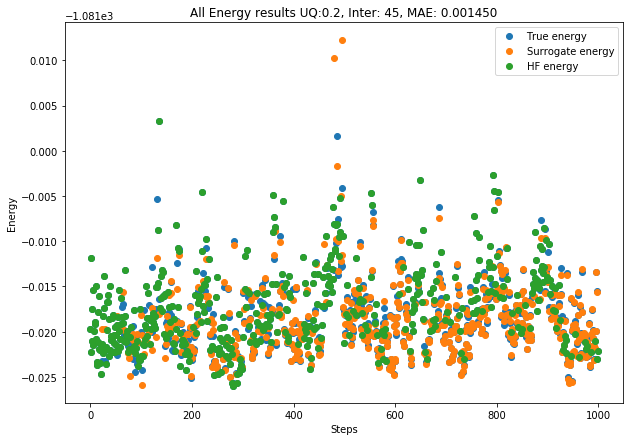

In [9]:
app = "06Aug20-224025_p_0.003_uq_0.2_T_500_I_45_M_1" ## Can find single results in data directory
results = pandas.read_csv(root_path + "/surrogate_only/"+ app + "/tests_run_data.csv")

fig, ax = plt.subplots(figsize=(10,7))
surrogate_energy_true = results[results['surrogate'] == True]
surrogate_energy_values = surrogate_energy_true['surrogate_energy']
new_energy = results[results['surrogate']== False]
new_energy_val = new_energy['new_energy']
true_energy = results['true_new_energy']
e_used = get_true_run(true_energy,surrogate_energy_true,surrogate_energy_values)
plt.plot(results['step'],true_energy[0:], 'o', label='True energy')
plt.plot(surrogate_energy_true['step'],surrogate_energy_values,'o', label='Surrogate energy')
plt.plot(new_energy['step'],new_energy_val,'o',label='HF energy')
uq_value = app.split('_')[4]
interval = app.split('_')[8]
#mae = format(mean_absolute_error(true_energy,results['surrogate_energy']),'.6f')
mae = format(mean_absolute_error(true_energy,list(e_used)),'.6f')
plt.title('All Energy results UQ:' + uq_value + ", Inter: " + interval + ', MAE: ' + str(mae) )
plt.ylabel('Energy')
plt.xlabel('Steps')
plt.legend()

## Mapping all trajectories you want to see

Uq: 0.1 - 0.7 (increments of 0.1)

experiment options:

    "NORT-Proxima_dynamicalpha", #Proxima - dynamic alpha with no retrain interval
    
    "NORT-Proxima_static-alpha", #Proxima - precalcualted alpha, no retrain interval
    
    "surrogate_only", ## Simple surrogate implementation
    
    "SS-UQ02-NORT_staticalpha", # Simple surrogate, uq:0.2, no retrain interval
    
    "DA_RT50", ## Proxima - dynamica alpha, testing single RT interval of 50 
    
    "DAallUQ_TEMP1000", ## Proxima - testing different retrain intervals and UQ's
    
    "SST1000_bestparameters", ## Simple surrogate - with different Retrain intervals tested
    
    "SS_RI300", ## Simple Surrogate with RI 300
    
    "SS-UQ02_I50", ## Simple surrogate, uq: 0.2, RI: 50

In [10]:
uq = '0.1'
experiment = 'surrogate_only'

In [11]:
all_results = glob.glob(root_path + "/" + experiment + "/*" + uq + "*")#19Jun20-05*

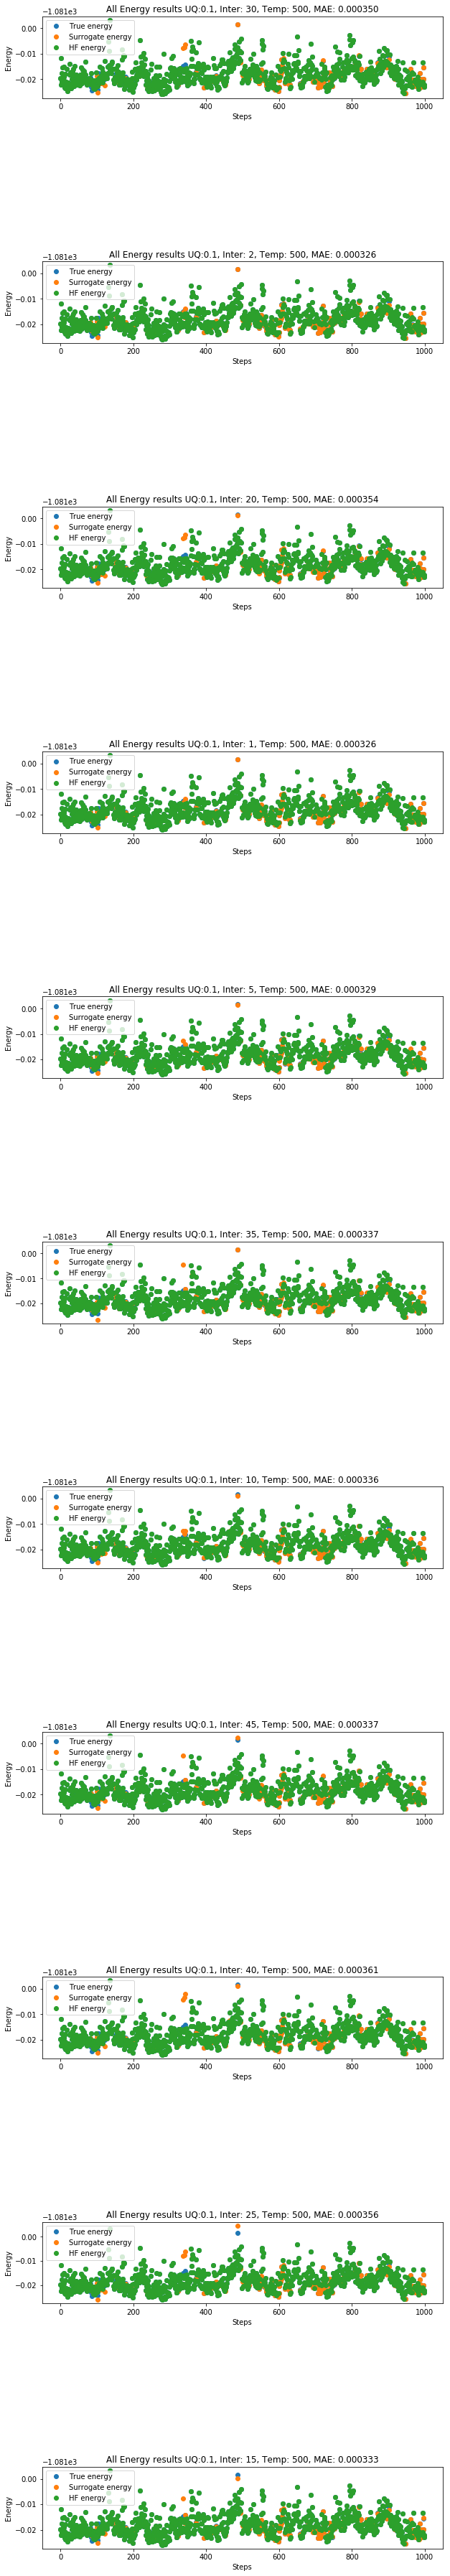

In [12]:

fig, ax = plt.subplots(nrows=len(all_results),figsize=(10,14))
plt.subplots_adjust(top=9.5, bottom=6, hspace=2, wspace=0.5)
#plt.subplots_adjust(hspace=0.25,wspace = 0.2)
for count, f in enumerate(all_results):
    file = f + "/tests_run_data.csv"
    results = pandas.read_csv(file)
    #import pdb; pdb.set_trace()
    surrogate_energy_true = results[results['surrogate'] == True]
    surrogate_energy_values = surrogate_energy_true['surrogate_energy']
    new_energy = results[results['surrogate']== False]
    new_energy_val = new_energy['new_energy']
    true_energy = results['true_new_energy']
    
    e_used = get_true_run(true_energy, surrogate_energy_true, surrogate_energy_values)
    mae = format(mean_absolute_error(true_energy,e_used),'.6f')
   
    ax[count].plot(results['step'],true_energy[0:], 'o', label='True energy')
    ax[count].plot(surrogate_energy_true['step'],surrogate_energy_values,'o', label='Surrogate energy')
    ax[count].plot(new_energy['step'],new_energy_val,'o',label='HF energy')
    uq_value = f.split('_')[6]
    interval = f.split('_')[10]
    temp = f.split('_')[8]
  
    ax[count].set_title('All Energy results UQ:' + uq_value + ", Inter: " + interval + ', Temp: ' + temp  + ', MAE: ' + str(mae))
    ax[count].set_ylabel('Energy')
    ax[count].set_xlabel('Steps')
    ax[count].legend()

